*The dataset of okra has a total of 501 images and are classified into 2 classes: AdequateMature and OverMature okra.*  

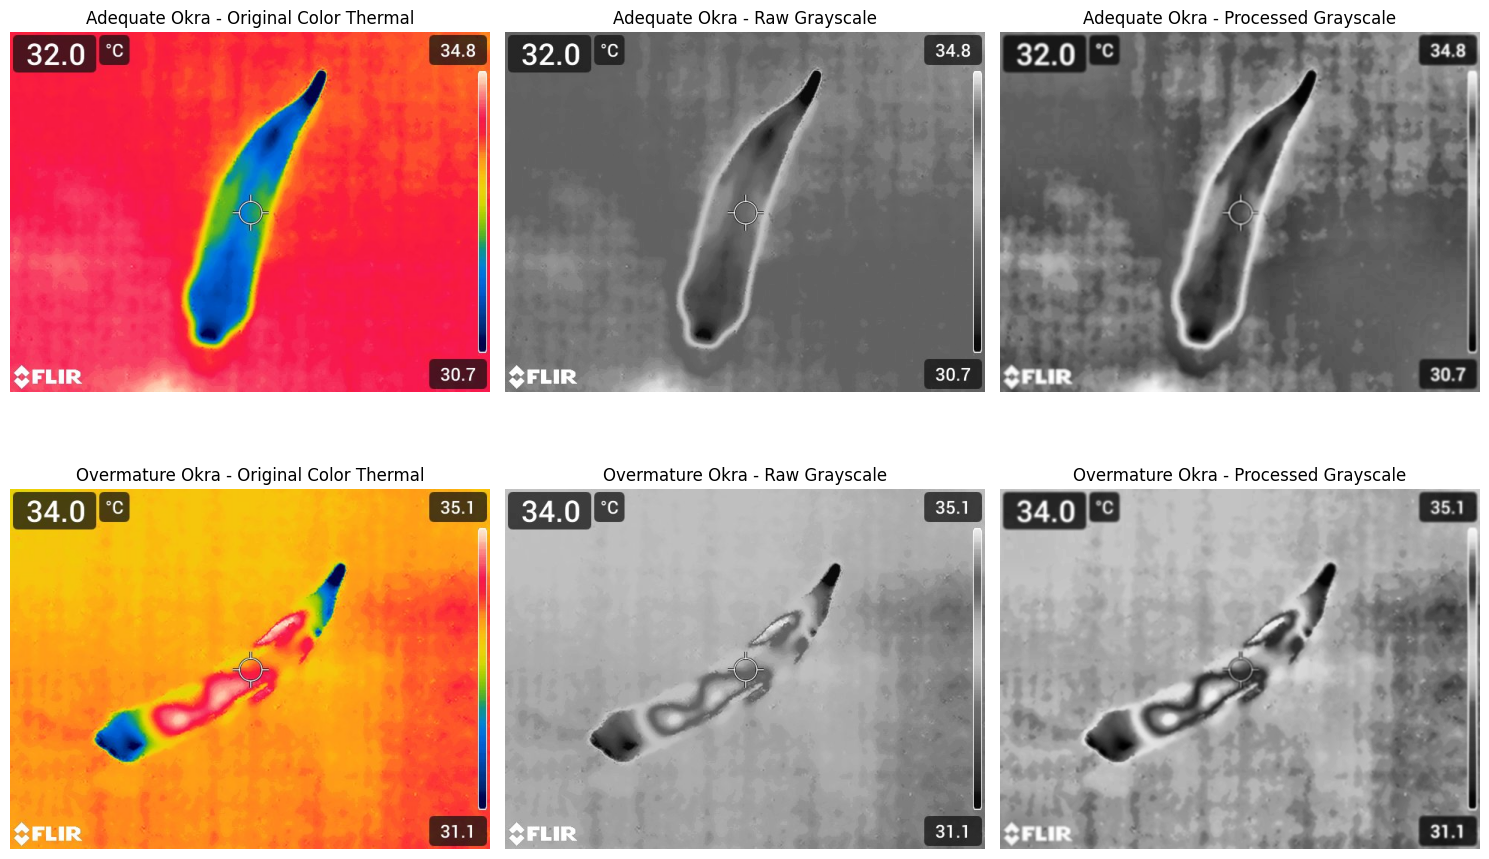

In [6]:
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

# Define the paths to your image folders
adequate_folder = '/kaggle/input/d/vedantichavan03/okra-dataset/AdequateMature'
overmature_folder = '/kaggle/input/d/vedantichavan03/okra-dataset/OverMature'

# Function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blurred)
    return enhanced

# Load sample images
adequate_image_path = glob(os.path.join(adequate_folder, '*.jpg'))[0]  # First image
overmature_image_path = glob(os.path.join(overmature_folder, '*.jpg'))[0]  # First image

# Load original color thermal images
adequate_color = cv2.cvtColor(cv2.imread(adequate_image_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
overmature_color = cv2.cvtColor(cv2.imread(overmature_image_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

# Load raw grayscale images
adequate_raw = cv2.imread(adequate_image_path, cv2.IMREAD_GRAYSCALE)
overmature_raw = cv2.imread(overmature_image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess grayscale images
adequate_processed = preprocess_image(adequate_image_path)
overmature_processed = preprocess_image(overmature_image_path)

# Plot the images
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(adequate_color)
plt.title('Adequate Okra - Original Color Thermal')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(adequate_raw, cmap='gray')
plt.title('Adequate Okra - Raw Grayscale')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(adequate_processed, cmap='gray')
plt.title('Adequate Okra - Processed Grayscale')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(overmature_color)
plt.title('Overmature Okra - Original Color Thermal')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(overmature_raw, cmap='gray')
plt.title('Overmature Okra - Raw Grayscale')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(overmature_processed, cmap='gray')
plt.title('Overmature Okra - Processed Grayscale')
plt.axis('off')

plt.tight_layout()
plt.show()

# Preprocess all images in folders
adequate_images = [preprocess_image(img) for img in glob(os.path.join(adequate_folder, '*.jpg'))]
overmature_images = [preprocess_image(img) for img in glob(os.path.join(overmature_folder, '*.jpg'))]


# Machine Learning Algorithm - Random forest classifier

Accuracy: 0.975609756097561
Precision: 1.0
Recall: 0.9473684210526315
Confusion Matrix:
 [[22  0]
 [ 1 18]]


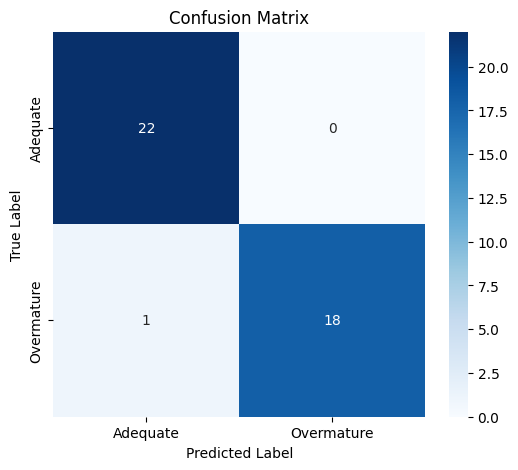


Classification Report:
               precision    recall  f1-score   support

    Adequate       0.96      1.00      0.98        22
  Overmature       1.00      0.95      0.97        19

    accuracy                           0.98        41
   macro avg       0.98      0.97      0.98        41
weighted avg       0.98      0.98      0.98        41



In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the labels (0 for adequate, 1 for overmature)
adequate_labels = [0] * len(adequate_images)
overmature_labels = [1] * len(overmature_images)

# Stack data and labels
X = np.array(adequate_images + overmature_images)
y = np.array(adequate_labels + overmature_labels)

# Flatten images for input into the classifier
X_flat = X.reshape((X.shape[0], -1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Train RandomForest Classifier as an ensemble method
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' since there are 2 classes
recall = recall_score(y_test, y_pred, average='binary')

# Print Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Adequate', 'Overmature'], yticklabels=['Adequate', 'Overmature'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (optional, provides detailed metrics)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Adequate', 'Overmature']))






# **Deep Learning Networks - used for implementing a CNN model**

In [8]:
import tensorflow as tf


In [9]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.utils import to_categorical


In [10]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Resize images to a smaller size (e.g., 64x64) for faster processing
X_resized = np.array([cv2.resize(image, (64, 64)) for image in X])

# Add channel dimension for grayscale
X_cnn = X_resized.reshape(-1, X_resized.shape[1], X_resized.shape[2], 1)
y_cnn = to_categorical(y, num_classes=2)

# Split data for CNN
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,    # Flip images horizontally for augmentation
    fill_mode='nearest'      # Fill in newly created pixels after transformations
)

# Fit the generator on the original training data
datagen.fit(X_train_cnn)

# Concatenate original and augmented data
# Flow the augmented images as well as the original ones
augmented_images = datagen.flow(X_train_cnn, y_train_cnn, batch_size=16)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_cnn.shape[1], X_cnn.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using both original and augmented data (increased epochs to 20)
model.fit(
    augmented_images,  # This will now include both original and augmented images
    epochs=50, 
    validation_data=(X_test_cnn, y_test_cnn)  # Use validation data
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test_cnn)
print("CNN Test Accuracy:", test_accuracy)



Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 3/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4028 - loss: 93.2459

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3973 - loss: 81.1136 - val_accuracy: 0.6341 - val_loss: 0.6057
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4541 - loss: 1.0458 - val_accuracy: 0.6829 - val_loss: 0.5770
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6134 - loss: 0.6201 - val_accuracy: 0.9756 - val_loss: 0.4641
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9092 - loss: 0.4384 - val_accuracy: 0.8780 - val_loss: 0.4109
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9337 - loss: 0.3279 - val_accuracy: 0.9756 - val_loss: 0.2315
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9672 - loss: 0.2144 - val_accuracy: 1.0000 - val_loss: 0.1436
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9081 - loss: 0.1998 - val_accuracy: 0.9512 - val_loss: 0.1516
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9547 - loss: 0.1554 - val_accuracy: 0.9512 - val_loss: 0

# Testing the image from the X_test dataset

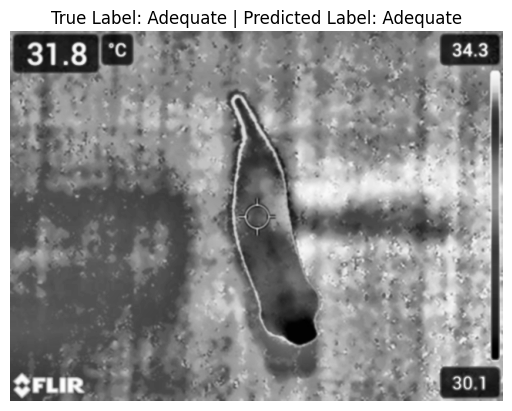

In [11]:
import matplotlib.pyplot as plt

def classify_and_display_image(index):
    image = X_test[index].reshape(X.shape[1], X.shape[2])  
    true_label = y_test[index]
    
    # Predict the class using the trained model
    predicted_label = clf.predict([X_test[index]])[0]
    
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {'Adequate' if true_label == 0 else 'Overmature'} | Predicted Label: {'Adequate' if predicted_label == 0 else 'Overmature'}")
    plt.axis('off')
    plt.show()

# Example usage: Classify and display the image at index 0 in X_test
classify_and_display_image(10)


# Testing using the CNN model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


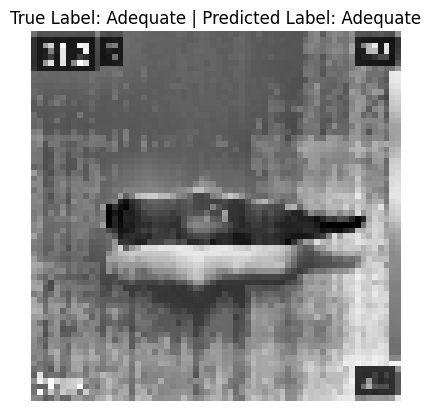

Confidence Scores: Adequate=1.0000, Overmature=0.0000


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to test and display a single image
def test_single_image(index):
    # Select the image and true label
    image = X_test_cnn[index]
    true_label = np.argmax(y_test_cnn[index])  # Convert one-hot encoding to class label
    
    # Add batch dimension for prediction
    image_batch = np.expand_dims(image, axis=0)
    
    # Predict the class probabilities
    predicted_probs = model.predict(image_batch)
    predicted_label = np.argmax(predicted_probs)  # Get the predicted class
    
    # Display the image
    plt.imshow(image.reshape(X_cnn.shape[1], X_cnn.shape[2]), cmap='gray')
    plt.title(f"True Label: {'Adequate' if true_label == 0 else 'Overmature'} | "
              f"Predicted Label: {'Adequate' if predicted_label == 0 else 'Overmature'}")
    plt.axis('off')
    plt.show()
    
    # Print the confidence scores
    print(f"Confidence Scores: Adequate={predicted_probs[0][0]:.4f}, Overmature={predicted_probs[0][1]:.4f}")

# Example usage: Test and display the first image in the test set
test_single_image(4)
